In [26]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

Review Count vs Revenue

We can add the trendline parameter in px.scatter. This will automatically calculate and display a trend line based on an ordinary least squares (OLS) regression, helping to highlight any overarching trends between the number of reviews and revenue.

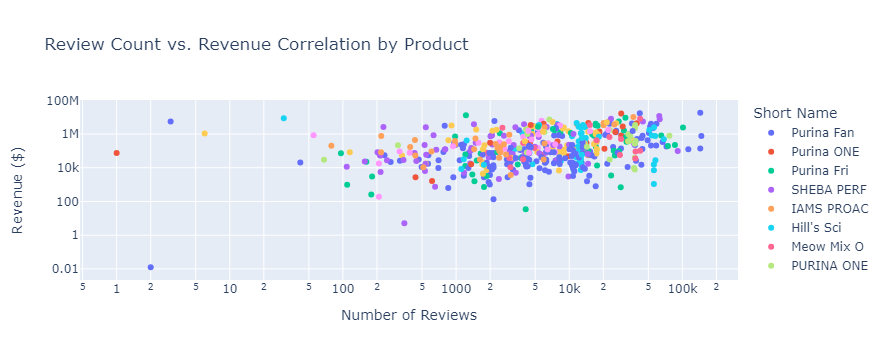

In [27]:
# Load the 'Segment Products' data
product_data = pd.read_excel('../Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Segment Products', header=1)

# Truncate product names to the first 10 characters for cleaner display
product_data['Short Name'] = product_data['Name'].apply(lambda x: x[:10])

# Filter out any zero or negative values that might interfere with log scaling
product_data = product_data[(product_data['# of Reviews'] > 0) & (product_data['Revenue'] > 0)]

# Create the scatter plot, using 'Short Name' for individual product identification
fig = px.scatter(
    product_data, 
    x='# of Reviews', 
    y='Revenue', 
    title='Review Count vs. Revenue Correlation by Product', 
    color='Short Name',  # Use the shortened product names for color coding
    hover_data=['Brand', 'Name'],  # Include full product name in the hover tooltips for clarity
    labels={'# of Reviews': 'Number of Reviews', 'Revenue': 'Revenue ($)'}
)

# Logarithmic scales for both axes
fig.update_layout(
    xaxis_title='Number of Reviews',
    yaxis_title='Revenue ($)',
    xaxis_type='log',
    yaxis_type='log'
)

# Show the plot
fig.show()

Rating vs. Revenue Correlation with Review Count as Bubble Size

In [28]:
# Filter out any potential outliers or erroneous data
product_data = product_data[(product_data['Rating'] > 0) & (product_data['Revenue'] > 0)]

# Create a bubble chart
fig = px.scatter(
    product_data,
    x='Rating',
    y='Revenue',
    size='# of Reviews',  # Corrected to use the actual column name for number of reviews
    color='Brand',  # Color code by brand for better brand-level insights
    hover_name='Name',  # Show product name on hover
    log_y=True,  # Log scale for revenue
    title='Rating vs. Revenue Correlation with Review Count as Bubble Size',
    labels={
        'Rating': 'Product Rating',
        'Revenue': 'Revenue ($)',
        '# of Reviews': 'Number of Reviews'
    }
)

# Prepare data for the trendline
x = product_data['Rating']
y = np.log(product_data['Revenue'])  # Log of Revenue for the linear trend
z = np.polyfit(x, y, 1)  # Degree 1 polynomial for a linear fit
p = np.poly1d(z)
# Add the trend line to the plot
fig.add_scatter(x=x, y=np.exp(p(x)), mode='lines', name='Trend Line')

# Show the plot
fig.show()

Impact of Customer Reviews and Ratings on Revenue by Brand

In [30]:
# Load Brand Trends
data = pd.read_excel('../Customer_Success_Engineer_-_Project_Data.xlsx', sheet_name='Brand Trends', header=1)
data['Revenue'] = data['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Aggregate data by brand to reduce clutter
brand_aggregated_data = data.groupby('Brands').agg({
    'Avg Reviews': 'mean',  # Average of average reviews
    'Revenue': 'sum',       # Sum of revenue
    'Unit Sales': 'sum'     # Sum of unit sales
}).reset_index()

# Display scatter plot with aggregated data
fig = px.scatter(
    brand_aggregated_data,
    x='Avg Reviews',
    y='Revenue',
    size='Unit Sales',
    hover_name='Brands',
    color="Brands",
    title='Impact of Customer Reviews and Ratings on Revenue by Brand',
    labels={
        'Avg Reviews': 'Average Reviews',
        'Revenue': 'Total Revenue ($)',
        'Unit Sales': 'Total Units Sold'
    },
    size_max=60,
    opacity=0.7  # Adjust opacity to manage overlapping
)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))  # Add borders to improve bubble distinction
fig.show()